In [ ]:
https://drive.google.com/drive/folders/18AiMAxChh37vooiSLXR88bIlRSNPiQM4?usp=sharing

In [4]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [5]:
import tensorflow as tf
print(tf.__version__)

2.19.0


In [6]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
ROOT_PATH = "/content/drive/MyDrive/flowers"

In [9]:
import os
os.chdir(ROOT_PATH)
os.getcwd()

'/content/drive/MyDrive/flowers'

In [10]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'flowers/train'
valid_path = 'flowers/validation'

In [11]:
# Import the VGG16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

resnet50 = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [12]:
# don't train existing weights
for layer in resnet50.layers:
  print(layer)

<InputLayer name=input_layer, built=True>
<ZeroPadding2D name=conv1_pad, built=True>
<Conv2D name=conv1_conv, built=True>
<BatchNormalization name=conv1_bn, built=True>
<Activation name=conv1_relu, built=True>
<ZeroPadding2D name=pool1_pad, built=True>
<MaxPooling2D name=pool1_pool, built=True>
<Conv2D name=conv2_block1_1_conv, built=True>
<BatchNormalization name=conv2_block1_1_bn, built=True>
<Activation name=conv2_block1_1_relu, built=True>
<Conv2D name=conv2_block1_2_conv, built=True>
<BatchNormalization name=conv2_block1_2_bn, built=True>
<Activation name=conv2_block1_2_relu, built=True>
<Conv2D name=conv2_block1_0_conv, built=True>
<Conv2D name=conv2_block1_3_conv, built=True>
<BatchNormalization name=conv2_block1_0_bn, built=True>
<BatchNormalization name=conv2_block1_3_bn, built=True>
<Add name=conv2_block1_add, built=True>
<Activation name=conv2_block1_out, built=True>
<Conv2D name=conv2_block2_1_conv, built=True>
<BatchNormalization name=conv2_block2_1_bn, built=True>
<Activa

In [13]:
# don't train existing weights
for layer in resnet50.layers:
    layer.trainable = False

In [14]:
for layer in resnet50.layers:
  print(layer.name,layer.trainable)

input_layer False
conv1_pad False
conv1_conv False
conv1_bn False
conv1_relu False
pool1_pad False
pool1_pool False
conv2_block1_1_conv False
conv2_block1_1_bn False
conv2_block1_1_relu False
conv2_block1_2_conv False
conv2_block1_2_bn False
conv2_block1_2_relu False
conv2_block1_0_conv False
conv2_block1_3_conv False
conv2_block1_0_bn False
conv2_block1_3_bn False
conv2_block1_add False
conv2_block1_out False
conv2_block2_1_conv False
conv2_block2_1_bn False
conv2_block2_1_relu False
conv2_block2_2_conv False
conv2_block2_2_bn False
conv2_block2_2_relu False
conv2_block2_3_conv False
conv2_block2_3_bn False
conv2_block2_add False
conv2_block2_out False
conv2_block3_1_conv False
conv2_block3_1_bn False
conv2_block3_1_relu False
conv2_block3_2_conv False
conv2_block3_2_bn False
conv2_block3_2_relu False
conv2_block3_3_conv False
conv2_block3_3_bn False
conv2_block3_add False
conv2_block3_out False
conv3_block1_1_conv False
conv3_block1_1_bn False
conv3_block1_1_relu False
conv3_block1_2

In [15]:
resnet50.summary()

Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 23,587,712 (89.98 MB)

In [16]:
  # useful for getting number of output classes
folders = glob('/content/drive/MyDrive/flowers/train/*')

In [17]:
folders

['/content/drive/MyDrive/flowers/train/rose',
 '/content/drive/MyDrive/flowers/train/daisy',
 '/content/drive/MyDrive/flowers/train/sunflower',
 '/content/drive/MyDrive/flowers/train/tulip',
 '/content/drive/MyDrive/flowers/train/dandelion']

In [18]:
len(folders)

5

In [19]:
model = Sequential()

model.add(resnet50)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(5,activation='softmax'))

In [20]:
# view the structure of the model
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 7, 7, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 100352)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    25,690,368 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │         1,285 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 49,279,365 (187.99 MB)

 Trainable params: 25,691,653 (98.01 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [21]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [22]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [23]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/flowers/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 600 images belonging to 5 classes.


In [24]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/flowers/validation',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 300 images belonging to 5 classes.


In [25]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=1,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


19/19 ━━━━━━━━━━━━━━━━━━━━ 457s 24s/step - accuracy: 0.1744 - loss: 17.4017 - val_accuracy: 0.3200 - val_loss: 5.8857


In [26]:
import matplotlib.pyplot as plt

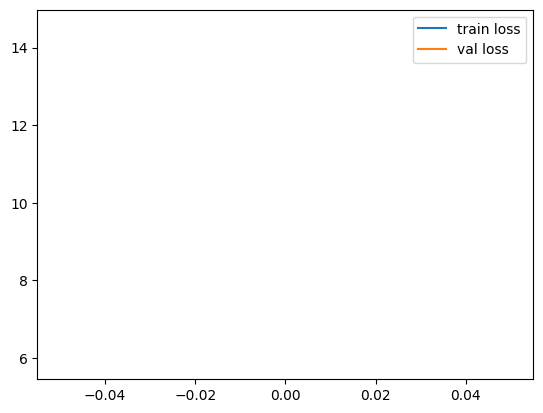

<Figure size 640x480 with 0 Axes>

In [27]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

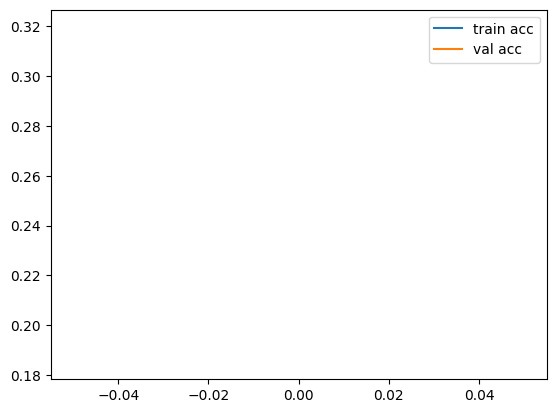

<Figure size 640x480 with 0 Axes>

In [28]:
# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [29]:
# save it as a h5 file
from tensorflow.keras.models import load_model

model.save('model_resnet50.h5')

In [30]:
y_pred = model.predict(test_set)

10/10 ━━━━━━━━━━━━━━━━━━━━ 62s 6s/step


In [31]:
y_pred

array([[3.9627495e-01, 9.2929560e-07, 3.1922898e-10, 4.9353247e-03,
        5.9878886e-01],
       [2.6447752e-01, 1.5852392e-02, 5.1036304e-09, 6.3774288e-01,
        8.1927292e-02],
       [5.4050285e-01, 2.1653177e-05, 2.5738562e-09, 2.0598492e-01,
        2.5349051e-01],
       ...,
       [1.3703275e-01, 2.3040155e-02, 3.5326930e-09, 8.1019014e-01,
        2.9736975e-02],
       [1.7648661e-01, 1.5093626e-02, 3.7108734e-09, 7.6442540e-01,
        4.3994404e-02],
       [2.1555065e-01, 8.4505249e-03, 3.1874883e-09, 7.1342766e-01,
        6.2571198e-02]], dtype=float32)

In [32]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [33]:
y_pred

array([4, 3, 0, 0, 3, 3, 0, 3, 3, 4, 0, 3, 3, 3, 3, 3, 3, 0, 3, 3, 0, 4,
       3, 3, 3, 3, 3, 3, 4, 3, 0, 0, 0, 0, 3, 0, 3, 3, 3, 4, 0, 3, 3, 0,
       3, 3, 3, 3, 0, 3, 0, 4, 3, 3, 3, 3, 3, 4, 3, 3, 0, 0, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 0, 3, 4, 3, 3, 3, 3, 0, 3, 3, 3, 0,
       3, 0, 4, 3, 3, 0, 3, 3, 4, 3, 3, 3, 0, 3, 3, 0, 3, 3, 3, 3, 3, 3,
       3, 3, 0, 3, 3, 3, 3, 0, 0, 3, 4, 3, 4, 0, 3, 0, 3, 0, 0, 0, 0, 3,
       3, 3, 3, 3, 0, 3, 0, 3, 3, 3, 3, 0, 4, 3, 3, 3, 3, 3, 0, 0, 3, 3,
       3, 0, 3, 3, 3, 3, 4, 3, 3, 0, 3, 3, 0, 3, 3, 4, 3, 3, 3, 0, 0, 3,
       3, 3, 0, 4, 4, 0, 3, 4, 0, 3, 3, 0, 3, 0, 3, 0, 0, 4, 3, 3, 0, 3,
       4, 0, 0, 0, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 0, 0, 4, 3, 0, 3, 3, 3,
       3, 3, 3, 3, 0, 0, 3, 0, 3, 0, 3, 0, 0, 3, 4, 3, 4, 0, 3, 3, 3, 3,
       3, 3, 3, 4, 0, 0, 3, 3, 3, 3, 4, 3, 3, 3, 0, 3, 0, 3, 3, 0, 3, 4,
       0, 4, 0, 3, 3, 3, 0, 0, 3, 0, 0, 0, 0, 0, 3, 0, 3, 3, 3, 3, 3, 4,
       3, 4, 3, 3, 0, 3, 0, 3, 4, 0, 0, 3, 3, 3])

In [34]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [35]:
model=load_model('model_resnet50.h5')

In [36]:
img=image.load_img('/content/drive/MyDrive/flowers/tulip.jpg',target_size=(224,224))

In [37]:
x=image.img_to_array(img)
x

array([[[215.,  87.,  12.],
        [221., 108.,  14.],
        [224., 116.,  15.],
        ...,
        [102.,  22.,  15.],
        [103.,  22.,  18.],
        [114.,  20.,  20.]],

       [[219.,  83.,  21.],
        [219.,  98.,  17.],
        [223., 108.,  19.],
        ...,
        [102.,  18.,  16.],
        [100.,  19.,  16.],
        [107.,  17.,  19.]],

       [[219.,  73.,  26.],
        [224.,  93.,  25.],
        [222.,  96.,  20.],
        ...,
        [101.,  15.,  18.],
        [ 98.,  16.,  18.],
        [ 99.,  14.,  17.]],

       ...,

       [[156.,  16.,  19.],
        [153.,  17.,  17.],
        [153.,  15.,  15.],
        ...,
        [ 91.,  17.,  14.],
        [ 89.,  18.,  14.],
        [ 90.,  19.,  15.]],

       [[158.,  15.,  19.],
        [155.,  17.,  17.],
        [153.,  15.,  15.],
        ...,
        [ 86.,  17.,  12.],
        [ 86.,  17.,  10.],
        [ 90.,  21.,  14.]],

       [[159.,  14.,  19.],
        [156.,  18.,  18.],
        [154.,  

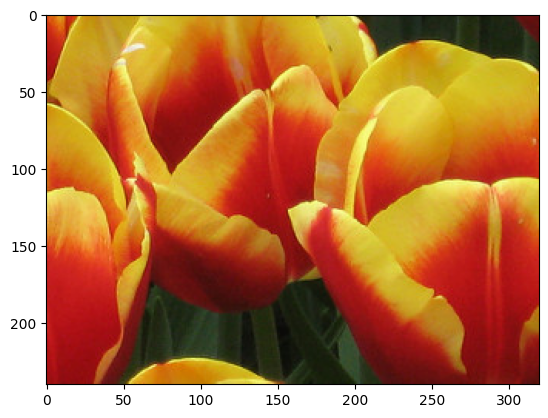

In [38]:
Z = plt.imread('tulip.jpg')
plt.imshow(Z)

In [39]:
x.shape

(224, 224, 3)

In [40]:
x=x/255

In [41]:
from keras.applications.vgg16 import preprocess_input

In [42]:
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [43]:
model.predict(img_data)

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


array([[3.1233546e-01, 2.1355643e-03, 4.2483771e-05, 2.7911419e-01,
        4.0637237e-01]], dtype=float32)

In [44]:
a=np.argmax(model.predict(img_data), axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 459ms/step


In [45]:
a

array([4])

In [46]:
flower_name = ['dandelion',
 'sunflower',
 'tulip',
 'daisy',
 'rose']

In [50]:
flower_name[a[0]]

'rose'